# Train CNN for MNIST dataset with different Hyperameters & Optimizers ###

#### The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database of handwritten digits, has a training set of 60,000 28x28 grayscale images of the 10 digits, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [2]:
#importing and installing the necessary modules
from keras.datasets import mnist
import numpy as np

2023-04-04 15:22:09.199658: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-04 15:22:09.250486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 15:22:09.467874: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 15:22:09.468958: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 15:22:10.627141: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


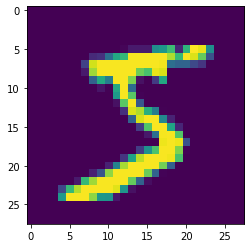

Label of this image is 5


In [4]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[0])
plt.show()
print("Label of this image is",ytrain[0])

In [5]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [6]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [7]:
#importing the model
from keras.models import Sequential
     

In [8]:
#creating model object
model=Sequential()

In [9]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [10]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=7,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=7,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [11]:
#compiling
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
     

### Trying different batch sizes and epochs

In [42]:
#training the model
model.fit(xtrain,ytrain,batch_size=64,epochs=1,validation_data=(xtest,ytest))

938/938 [==============================] - 47s 50ms/step - loss: 0.1113 - accuracy: 0.9657 - val_loss: 0.0481 - val_accuracy: 0.9841


In [44]:

#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 8ms/step - loss: 0.0481 - accuracy: 0.9841


([0.046233169734478, 0.9860833287239075],
 [0.048134028911590576, 0.9840999841690063])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)             

#### model_accuracy on xtrain,ytrain =  1875/1875 [==============================] - 21s 11ms/step - loss: 0.0116 - accuracy: 0.9963 or 99.63%

#### model_accuracy on xtest,ytest = 313/313 [==============================] - 5s 15ms/step - loss: 0.0288 - accuracy: 0.990 0r 99.01%

## Epochs 2, batch size 32

In [46]:
#training the model
model.fit(xtrain,ytrain,batch_size=32,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 2/2
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0330 - val_accuracy: 0.9899


In [47]:
#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 9ms/step - loss: 0.0330 - accuracy: 0.9899


([0.019383836537599564, 0.9942333102226257],
 [0.03303733095526695, 0.9898999929428101])

## Epochs 5, batch size 32

In [51]:
#training the model
model.fit(xtrain,ytrain,batch_size=32,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0524 - val_accuracy: 0.9934
Epoch 2/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0077 - accuracy: 0.9984 - val_loss: 0.0560 - val_accuracy: 0.9936
Epoch 3/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0092 - accuracy: 0.9982 - val_loss: 0.0549 - val_accuracy: 0.9927
Epoch 4/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0586 - val_accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 0.0961 - val_accuracy: 0.9897


In [52]:

#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 8ms/step - loss: 0.0961 - accuracy: 0.9897


([0.010670237243175507, 0.997866690158844],
 [0.09609836339950562, 0.9897000193595886])

## Epochs 2, batch size 32

In [53]:
#training the model
model.fit(xtrain,ytrain,batch_size=32,epochs=2,validation_data=(xtest,ytest))

Epoch 1/2
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.1016 - val_accuracy: 0.9916
Epoch 2/2
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.1018 - val_accuracy: 0.9915


In [12]:

#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 8ms/step - loss: 2.4099 - accuracy: 0.0980


([2.408242702484131, 0.09871666878461838],
 [2.409926652908325, 0.09799999743700027])

## Using AdaDelta optimizer

In [15]:
#compiling
model.compile(optimizer= "AdaDelta", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [16]:
#training the model
model.fit(xtrain,ytrain,batch_size=64,epochs=1,validation_data=(xtest,ytest))

938/938 [==============================] - 53s 56ms/step - loss: 2.3908 - accuracy: 0.0987 - val_loss: 2.3728 - val_accuracy: 0.0980


In [17]:

#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 8ms/step - loss: 2.3728 - accuracy: 0.0980


([2.372091770172119, 0.09871666878461838],
 [2.3728222846984863, 0.09799999743700027])

## Using Adagrad optimiAdagradzer

In [19]:
#compiling
model.compile(optimizer= "Adagrad", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
#training the model
model.fit(xtrain,ytrain,batch_size=64,epochs=1,validation_data=(xtest,ytest))

938/938 [==============================] - 42s 44ms/step - loss: 2.2579 - accuracy: 0.1644 - val_loss: 2.1140 - val_accuracy: 0.3013


In [21]:

#model train and test scores
model.evaluate(xtrain,ytrain),model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 9ms/step - loss: 2.1140 - accuracy: 0.3013


([2.1178784370422363, 0.28968334197998047],
 [2.113976240158081, 0.3012999892234802])

## From the above practice the best approch is to use "adam" optimizer , batch size 32, and epochs 5 it will give you accuracy aroun 99.7 on train data and 98.8 on test data

## Activation functions used are relu , sigmoid, and softmax